# Proyecto 1 — Dashboard de Ventas y KPIs

Este notebook carga el dataset de ventas, calcula KPIs básicos y genera gráficas para tu README o reporte.

📁 **Colócalo en:** `proyecto-1-dashboard-ventas/notebooks/analisis_ventas.ipynb` dentro de tu repositorio.

🔗 **Fuente de datos esperada:** `../data/ventas_sucursales.csv`


In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Ruta relativa asumiendo que este notebook vive en proyecto-1-dashboard-ventas/notebooks/
base = Path('..')
data_path = base / 'data' / 'ventas_sucursales.csv'
df = pd.read_csv(data_path)
df['fecha'] = pd.to_datetime(df['fecha'])
df.head()

,fecha,sucursal_id,sucursal,hora,platillo,categoria,cantidad,precio_unitario_mxn,total_mxn
0,2025-06-01,SUC-01,Centro,12:00,Hamburguesa Clásica,Comidas,3,95,285
1,2025-06-01,SUC-01,Centro,13:00,Papas Fritas,Acompañamientos,5,35,175
2,2025-06-01,SUC-02,Norte,19:00,Tacos de Arrachera,Comidas,4,110,440
3,2025-06-02,SUC-03,Sur,09:00,Café Americano,Bebidas,10,29,290
4,2025-06-02,SUC-04,Río,21:00,Malteada Vainilla,Bebidas,2,55,110


## KPIs básicos
- Ingreso total (MXN)
- Unidades totales vendidas
- Ingreso por sucursal
- Top 10 platillos por ingreso
- Ventas por hora (MXN)


In [2]:
ingreso_total = df['total_mxn'].sum()
unidades_totales = df['cantidad'].sum()
ingreso_por_sucursal = df.groupby('sucursal', as_index=False)['total_mxn'].sum().sort_values('total_mxn', ascending=False)
top_platillos = df.groupby('platillo', as_index=False)['total_mxn'].sum().sort_values('total_mxn', ascending=False).head(10)
ventas_por_hora = df.groupby('hora', as_index=False)['total_mxn'].sum().sort_values('hora')

ingreso_total, unidades_totales

(np.int64(2896), np.int64(52))

In [3]:
ingreso_por_sucursal

,sucursal,total_mxn
1,Centro,934
4,Sur,765
2,Norte,664
3,Río,355
0,Aeropuerto,178


In [4]:
top_platillos

,platillo,total_mxn
3,Hamburguesa Clásica,760
0,Alitas BBQ,474
7,Tacos de Arrachera,440
5,Papas Fritas,420
1,Café Americano,290
6,Refresco 600ml,224
2,Ensalada César,178
4,Malteada Vainilla,110


## Gráficas (matplotlib)
_Una figura por gráfico; no se usa seaborn._

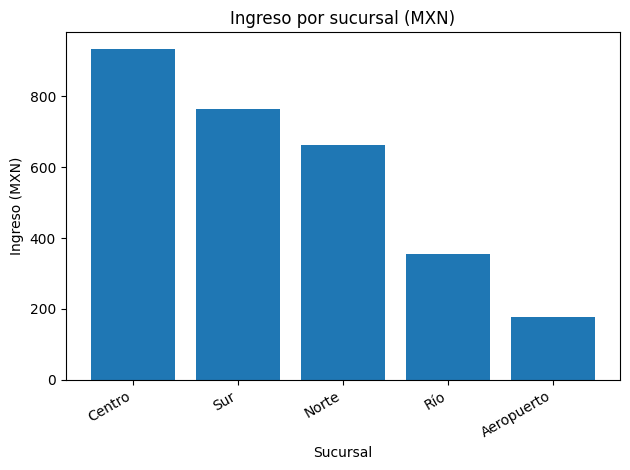

In [5]:
plt.figure()
plt.bar(ingreso_por_sucursal['sucursal'], ingreso_por_sucursal['total_mxn'])
plt.title('Ingreso por sucursal (MXN)')
plt.xlabel('Sucursal')
plt.ylabel('Ingreso (MXN)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

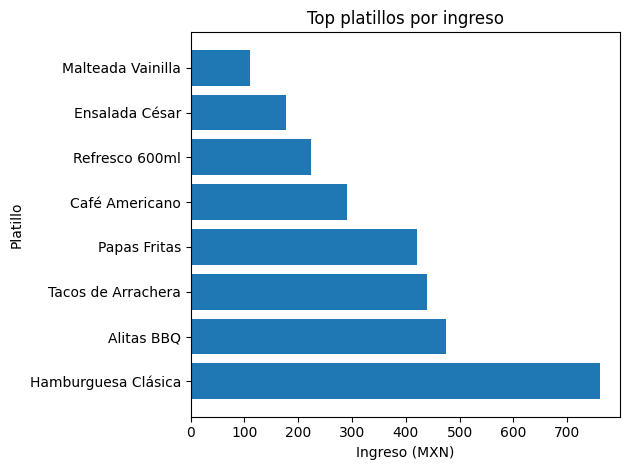

In [6]:
plt.figure()
plt.barh(top_platillos['platillo'], top_platillos['total_mxn'])
plt.title('Top platillos por ingreso')
plt.xlabel('Ingreso (MXN)')
plt.ylabel('Platillo')
plt.tight_layout()
plt.show()

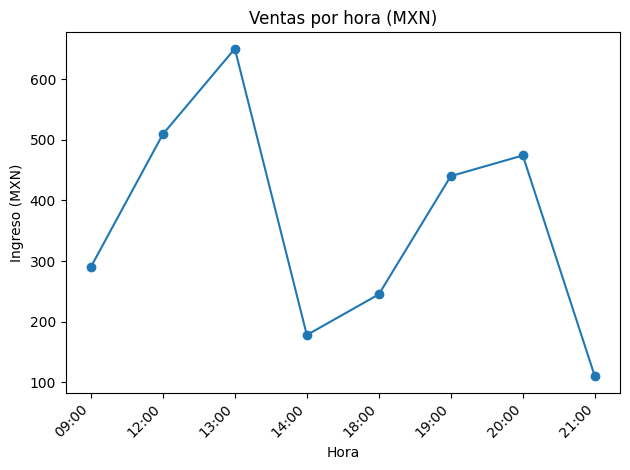

In [7]:
plt.figure()
plt.plot(ventas_por_hora['hora'], ventas_por_hora['total_mxn'], marker='o')
plt.title('Ventas por hora (MXN)')
plt.xlabel('Hora')
plt.ylabel('Ingreso (MXN)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Exportar CSVs a `/reports`
Estos archivos son útiles para llevarlos a Excel o Power BI.

In [8]:
reports = base / 'reports'
reports.mkdir(exist_ok=True)
ingreso_por_sucursal.to_csv(reports / 'ingreso_por_sucursal.csv', index=False)
top_platillos.to_csv(reports / 'top_platillos.csv', index=False)
ventas_por_hora.to_csv(reports / 'ventas_por_hora.csv', index=False)
print('Listo: CSVs en la carpeta reports/')

Listo: CSVs en la carpeta reports/
